# Вариант 15

In [110]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
N = 6
M = 100
T = 1
L = 1
a = 0.01

h = L / M
tau = T / N
t = N * tau
x = M * h

X_l = np.linspace(0, L, M)
T_l = np.linspace(0, T, N)

In [112]:
a*tau/h

0.16666666666666666

# P1

## T1

$$
\dfrac{u_i^{j + 1} - u_i^j}{\tau} = a^2 \cdot \dfrac{u^j_{i+1} + 1 - 2u^j_{i} + u^j_{i-1} - 1}{h^2} + \phi(x, t)
$$

$$
u_i^{j + 1} = \tau\left(a^2 \cdot \dfrac{u^j_{i+1} + 1 - 2u^j_{i} + u^j_{i-1} - 1}{h^2} + \phi(x, t)\right) + u_i^j
$$

In [113]:
gamma_0 = gamma_1 = 0

In [114]:
def phi(x, t):
    return x ** 2 * (1 - x)

def ddphi(x, t):
    return 0

def psi(x):
    return x * (x ** 2 - x)

In [115]:
U = np.zeros((N, M))

In [116]:
def u_0(psi):
    return psi(X_l)

def u_j1(u_im, u_i, u_ip, x, t):
    aboba = phi(x, t)
    return tau * ((a ** 2 / h ** 2)*(u_ip + 1 - 2 * u_i + u_im - 1) + aboba) + u_i



In [117]:
U[0] = u_0(psi)

In [118]:
for index in range(N):
    U[index][0] = gamma_0
    U[index][-1] = gamma_1

In [120]:
for t_index in range(1, N):
    for l_index in range(1, M - 1):
        u_im, u_i, u_ip = U[t_index - 1][l_index - 1 : l_index + 1 + 1]
        U[t_index][l_index] = u_j1(u_im, u_i, u_ip, X_l[l_index], T_l[t_index])

<Axes: >

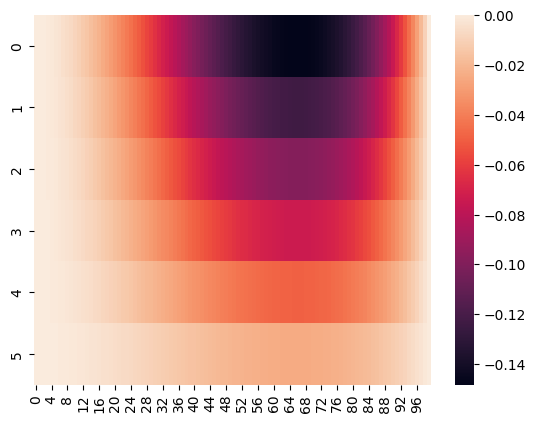

In [123]:
sns.heatmap(U)

## T2
$$
\dfrac{u_i^{j+1} - u_i^j}{\tau} = a^2\dfrac{u^{j+1}_{i + 1} - 2u_{i}^{j+1} + u_{i - 1}^{j+1}}{h^2} + \phi(x, t)
$$

$$
h^2 \cdot u_i^{j + 1} - u^{j + 1}_{i + 1} + 2u^{j + 1}_i -u^{j + 1}_{i - 1} = \tau \cdot a^2 + u^j_i \cdot h^2 + \phi(x, t)\cdot h^2 \cdot \tau
$$

In [ ]:
def u_j1(u_im, u_i, u_ip, x, t):
    aboba = phi(x, t)
    return tau * ((a ** 2 / h ** 2)*(u_ip + 1 - 2 * u_i + u_im - 1) + aboba) + u_i

In [153]:
Y = np.zeros((M, M))
Y[0][1] = 1
Y[-1][-2] = -1
np.fill_diagonal(Y, h ** 2 + 2)
for row in range(1, M - 1):
    Y[row][row - 1] = -1
    Y[row][row + 1] = 1
Y

array([[ 2.0001,  1.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
       [-1.    ,  2.0001,  1.    , ...,  0.    ,  0.    ,  0.    ],
       [ 0.    , -1.    ,  2.0001, ...,  0.    ,  0.    ,  0.    ],
       ...,
       [ 0.    ,  0.    ,  0.    , ...,  2.0001,  1.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    , ..., -1.    ,  2.0001,  1.    ],
       [ 0.    ,  0.    ,  0.    , ...,  0.    , -1.    ,  2.0001]],
      shape=(100, 100))

In [ ]:
U[0] = u_0(psi)

In [ ]:
for index in range(N):
    U[index][0] = gamma_0
    U[index][-1] = gamma_1